**Universidad Internacional de La Rioja (UNIR) - Máster Universitario en Inteligencia Artificial - Procesamiento del Lenguaje Natural**

***
Datos del alumno (Nombre y Apellidos): Jose Manuel Pinillos Rubio

Fecha: 11 de diciembre de 2024
***

<span style="font-size: 20pt; font-weight: bold; color: #0098cd;">Named-Entity Recognition</span>

**Objetivos**

Con esta actividad se tratará de que el alumno se familiarice con el manejo de la librería spacy, así como con los conceptos básicos de manejo de las técnicas NER

**Descripción**

En esta actividad debes procesar de forma automática un texto en lenguaje natural para detectar características básicas en el mismo, y para identificar y etiquetar las ocurrencias de conceptos como localización, moneda, empresas, etc.

En la primera parte del ejercicio se proporciona un código fuente a través del cual se lee un archivo de texto y se realiza un preprocesado del mismo. En esta parte el alumno tan sólo debe ejecutar y entender el código proporcionado.

En la segunda parte del ejercicio se plantean una serie de preguntas que deben ser respondidas por el alumno. Cada pregunta deberá responderse con un fragmento de código fuente que esté acompañado de la explicación correspondiente. Para elaborar el código solicitado, el alumno deberá visitar la documentación de la librería spacy, cuyos enlaces se proporcionarán donde corresponda.

# Parte 1: carga y preprocesamiento del texto a analizar

Observa las diferentes librerías que se están importando.

In [ ]:
import pathlib
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from spacy import displacy
import csv
!python -m spacy download es_core_news_md
import es_core_news_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 14.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


El siguiente código simplemente carga y preprocesa el texto. Para ello, lo primero que hace es cargar un modelo de lenguaje previamente entrenado. En este caso, se utiliza <i>es_core_news_md</i>:

https://spacy.io/models/es#es_core_news_md


In [ ]:
nlp = es_core_news_md.load()

El objeto <i>nlp</i> permite utilizar el modelo de lenguaje cargado, de forma que se puede procesar un texto y obtenerlo en su versión preprocesada. Así, nos permite realizar las diferentes tareas. En este caso, vamos a utilizar el pipeline para hacer un preprocesamiento básico, que consiste en tokenizar el texto.

In [ ]:
def count_rows_csv(filename):
  # Abre el archivo en modo lectura, con codificación UTF-8 y omitiendo errores de codificación
  with open(filename, 'r', encoding='utf-8', errors='ignore') as file:
    # Crea un objeto lector para iterar sobre las filas del archivo CSV
    reader = csv.reader(file)
    # Salta la cabecera de la columna
    next(reader, None)
    # Cuenta el número de filas restantes en el archivo
    row_count = sum(1 for row in reader)
  return row_count

filename = "./02Dataset_sin_procesar.csv"
# Llama a la función y almacena el número de filas en num_rows
num_rows = count_rows_csv(filename)
print (f"El archivo tiene {num_rows} filas.")

El archivo tiene 656431 filas.


El código anterior analiza el documento y comprueba el número de líneas que tiene el fichero.
Esto lo realizamos para comprobar que nuestro *dataset* concuerda con el necesario para realizar esta actividad.

In [ ]:
filename = "./02Dataset_sin_procesar.csv"
data = pd.read_csv(filename, delimiter=';', encoding='utf-8', encoding_errors='ignore')

<ipython-input-9-77553cb452ef>:2: DtypeWarning: Columns (5,6,7,8,9,10,11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filename, delimiter=';', encoding='utf-8', encoding_errors='ignore')


In [ ]:
data.head()

,MEDIO,SOPORTE,URL,TIPO DE MENSAJE,CONTENIDO A ANALIZAR,INTENSIDAD,TIPO DE ODIO,TONO HUMORISTICO,MODIFICADOR,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,EL PAÍS,WEB,https://elpais.com/deportes/2021-01-20/alcoyan...,COMENTARIO,el barça nunca acaeza ante un segundo b ni ant...,3.0,Otros,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EL PAÍS,WEB,https://elpais.com/deportes/2021-01-20/alcoyan...,COMENTARIO,el real madrid ha puesto punto y final a su an...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EL PAÍS,WEB,https://elpais.com/espana/2021-01-18/comienza-...,COMENTARIO,cristina cifuentes podría haber sido la presid...,3.0,Ideológico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EL PAÍS,WEB,https://elpais.com/espana/2021-01-18/comienza-...,COMENTARIO,habría que reabrir el caso. el supremo se dedi...,3.0,Ideológico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,EL PAÍS,WEB,https://elpais.com/espana/2021-01-18/comienza-...,COMENTARIO,me parece un poco exagerado pedir más de tres ...,3.0,Ideológico,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


El código anterior carga el archivo CSV (opcionalmente con un límite de líneas a leer) y genera la variable <i>data</i>, que contiene un Dataframe (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) con los datos leídos del CSV.

In [ ]:
# Número de filas a seleccionar
lines_number = 20000

# Seleccionamos un subconjunto aleatorio de filas del Dataframe 'data'.
sample_data = data.sample(n=lines_number, random_state=13)

# Mostramos las 5 primeras filas del dataframe
sample_data.head()

,MEDIO,SOPORTE,URL,TIPO DE MENSAJE,CONTENIDO A ANALIZAR,INTENSIDAD,TIPO DE ODIO,TONO HUMORISTICO,MODIFICADOR,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
443655,EL PAÍS,WEB,https://www.elpais.com/internacional/2021-08-1...,NOTICIA,dos días después de dirigirse a la nación con ...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
470578,EL MUNDO,TWITTER,https://twitter.com/633257588/status/134905959...,COMENTARIO,pocos son,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185583,20MIN,WEB,https://www.20minutos.es/noticia/4555609/0/apu...,COMENTARIO,avisen cuando a los 4 millones de parados nos ...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
332547,La Vanguardia,WEB,https://www.lavanguardia.com/politica/20210119...,COMENTARIO,@tristissima noctis imago @lamosca no creo que...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
451006,EL PAÍS,WEB,https://www.elpais.com/opinion/2021-06-07/los-...,TITULAR NOTICIA,los sepultureros del derecho comunitario,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


El código selecciona una muestra aleatoria  de 20.000 filas del *dataset* original, que consta de 656431 filas. Esta selección se realiza con el fin de reducir el tamaño del *dataset* para que el procesamiento y análisis sean más rápidos y manejables, sin comprometer la representatividad de los datos.

La función `sample()` se utiliza para extraer las filas de manera aleatoria. El argumento `n=lines_number` especifica el tamaño de la muestra, en este caso 20.000 filas. Para garantizar que el subconjunto seleccionado sea reproducible en futuros análisis, se utiliza el parámetro `random_state=13`, que actúa como semilla. Esto asegura que, si se ejecuta el código varias veces con el mismo *dataset* y la misma semilla, el subconjunto seleccionado será idéntico.

Finalmente, el método `head()` lo empleamos para mostrar las primeras cinco filas del *dataset* resultante, permitiendo verificar que la operación se ha realizado correctamente.

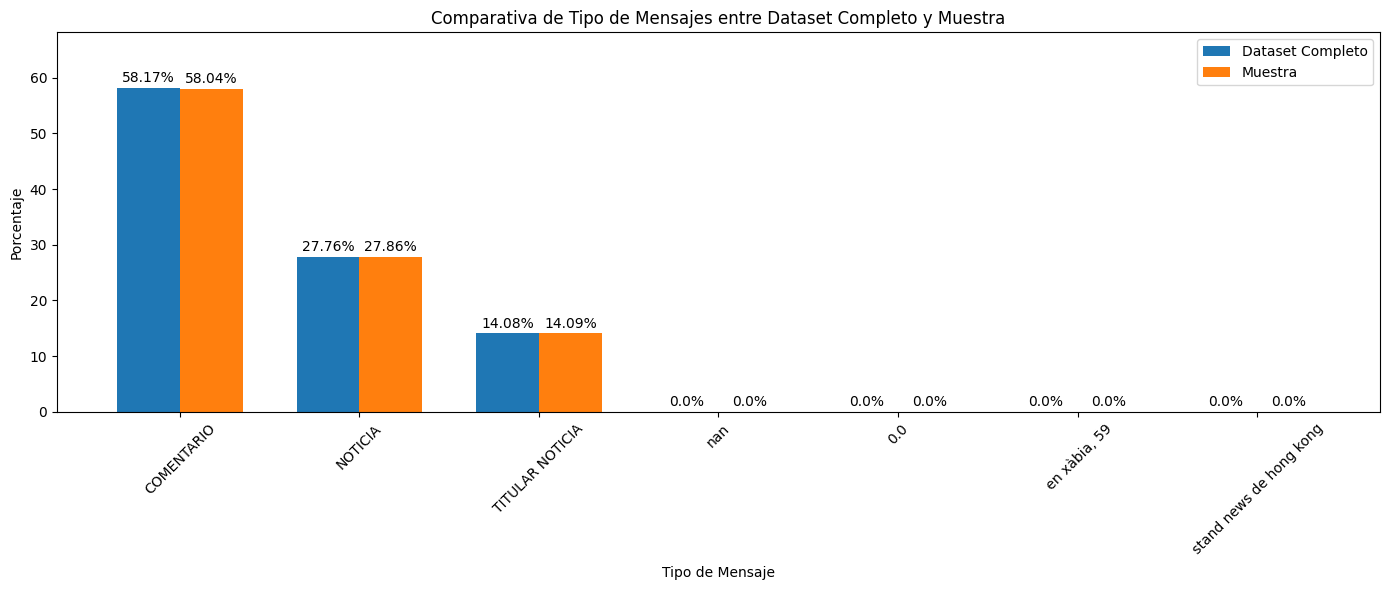

In [ ]:
# Obtenemos todas las categorías posibles
all_categories = pd.concat([data['TIPO DE MENSAJE'], sample_data['TIPO DE MENSAJE']]).unique()

# Calculamos los porcentajes para el dataset completo y reindexar
tipo_mensaje_counts = data['TIPO DE MENSAJE'].value_counts(normalize=True)
tipo_mensaje_percentage = (tipo_mensaje_counts * 100).round(2)
tipo_mensaje_percentage = tipo_mensaje_percentage.reindex(all_categories, fill_value=0)  # Rellenar categorías faltantes con 0

# Calculamos los porcentajes para la muestra y reindexar
sample_tipo_mensaje_counts = sample_data['TIPO DE MENSAJE'].value_counts(normalize=True)
sample_tipo_mensaje_percentage = (sample_tipo_mensaje_counts * 100).round(2)
sample_tipo_mensaje_percentage = sample_tipo_mensaje_percentage.reindex(all_categories, fill_value=0)  # Rellenar categorías faltantes con 0

# Configuramos el tamaño de la figura
plt.figure(figsize=(14, 6))

# Indices para las barras
index = np.arange(len(tipo_mensaje_percentage))  # Asume que ambos tienen los mismos tipos de mensajes

# Ancho de las barras
bar_width = 0.35

# Creamos las barras para el dataset completo
plt.bar(index, tipo_mensaje_percentage.values, bar_width, label='Dataset Completo')

# Creamos las barras para la muestra
plt.bar(index + bar_width, sample_tipo_mensaje_percentage.values, bar_width, label='Muestra')

# Añadimos el título y las etiquetas
plt.xlabel('Tipo de Mensaje')
plt.ylabel('Porcentaje')
plt.title('Comparativa de Tipo de Mensajes entre Dataset Completo y Muestra')
plt.xticks(index + bar_width / 2, tipo_mensaje_percentage.index, rotation=45)  # Ajustar los ticks para que aparezcan en el medio

# Añadimos la leyenda
plt.legend()

# Ajustamos los límites del eje Y para enfocar en un rango más estrecho
plt.ylim(ymin=0, ymax=tipo_mensaje_percentage.max() + 10)  # Aumentamos un poco sobre el máximo para mejorrar la visualización

# Loop para agregar etiquetas en las barras del dataset completo
for i in range(len(index)):
    plt.text(i, tipo_mensaje_percentage.values[i] + 0.5, f'{tipo_mensaje_percentage.values[i]}%', ha='center', va='bottom')

# Loop para agregar etiquetas en las barras de la muestra
for i in range(len(index)):
    plt.text(i + bar_width, sample_tipo_mensaje_percentage.values[i] + 0.5, f'{sample_tipo_mensaje_percentage.values[i]}%', ha='center', va='bottom')

# Mostramos la gráfica
plt.tight_layout()
plt.show()

El objetivo del código es verificar si la muestra seleccionada del *dataset* es representativa del conjunto completo de datos. Esto resulta fundamental para garantizar que cualquier conclusión o modelo construido a partir de la muestra pueda generalizarse adecuadamente al *dataset* completo.

Primero, se calculan los porcentajes de cada categoría en la columna `'TIPO DE MENSAJE'` tanto en el *dataset* completo como en la muestra. Esto permite analizar y comparar cómo se distribuyen los diferentes tipos de mensajes en ambos conjuntos. Posteriormente, los porcentajes se visualizan en una gráfica de barras, donde cada barra representa la proporción de una categoría en uno u otro conjunto.

En base a la gráfica, podemos observar que la distribución de los tipos de mensajes en la muestra es altamente representativa del *dataset* completo. Los porcentajes de las categorías `'COMENTARIO'`, `'NOTICIA'`, y `'TITULAR NOTICIA'` son prácticamente idénticos entre ambos conjuntos:
- `'COMENTARIO'`: 58.17% en el *dataset* completo frente a 58.04% en la muestra.
- `'NOTICIA'`: 27.76% en el *dataset* completo frente a 27.86% en la muestra.
- `'TITULAR NOTICIA'`: 14.08% en el *dataset* completo frente a 14.09% en la muestra.

Estas ligerísimas variaciones están dentro de lo esperable para un muestreo aleatorio y no afectan la representatividad general.

Por otro lado, las categorías atípicas, como valores nulos (`NaN`) o términos inusuales (por ejemplo, `'en jávea, 59'` o `'stana news de hong kong'`), tienen una representación prácticamente nula en ambos conjuntos y no influyen en los resultados principales. Esto confirma que la muestra es adecuada y que las conclusiones derivadas del análisis serán generalizables al *dataset* completo.

Te vendrá bien conocer la siguiente documentación:
<ul>
    <li>https://spacy.io/api/doc</li>
    <li>https://spacy.io/api/token</li>
    <li>https://spacy.io/api/morphology#morphanalysis</li>
</ul>

### Playground

Utiliza este espacio para hacer pruebas y ensayos con las variables generadas con el código previo. A modo de ejemplo, se ofrece código que realiza las siguientes tareas:


- leer un número dado de líneas del Dataframe y generar dos listas con los valores (se pueden leer directamente del DataFrame, se muestra el ejemplo como una opción más)
- procesar el texto de cada comentario


Para procesarlo, hay utilizar el objeto <i>nlp</i> y así obtener objetos de la clase <i>Doc</i> (https://spacy.io/api/doc)

Visita la documentación de dicha clase y experimenta probando las diferentes funciones y atributos

In [ ]:
# Puedes insertar aquí código de pruebas para experimentar con las diferentes funciones y atributos de 'doc'.
#print(data["CONTENIDO A ANALIZAR"][1])
#print(data["INTENSIDAD"][1])
doc = []
value = []

#con el bucle, generamos sendas listas con los comentarios ya parseados y con el valor de intensidad
for i in range(0, 10):

    #en un primer paso se parsea el comentario. En el segundo paso se añade el objeto a la lista
    tmp_doc = nlp(data["CONTENIDO A ANALIZAR"][i])
    doc.append(tmp_doc)

    #en un primer paso extrae el valor. En el segundo paso se añade el valor a la lista
    tmp_value = data["INTENSIDAD"][i]
    value.append(tmp_value)


#ejemplo de cómo recorrer un comentario palabra por palabra
for token in doc[1]:
    print(token)

# Actividad

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 1.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">¿Cuántos registros contiene el corpus?</span>

In [ ]:
# Utilizamos '.shape[0]' para obtener el número de filas de nuestro dataset.
registers = sample_data.shape[0]

# Realizamos esta parte para contar el numero de registros que contiene datos.
corpus = sample_data['CONTENIDO A ANALIZAR'].fillna("").str.strip() != ""
corpus = corpus.sum()

print(f"El corpus contiene un total de {registers} registros, de los cuales {corpus} tienen contenido para analizar.")

El corpus contiene un total de 20000 registros, de los cuales 19996 tienen contenido para analizar.


Para determinar cuántos registros contiene el corpus, primero obtenemos el número total de filas del *dataset* utilizando la propiedad `.shape[0]`. Esto nos da el total de registros en el dataset, independientemente de si contienen datos o están vacíos.

A continuación, realizamos una operación adicional para contar únicamente los registros que contienen datos en la columna `CONTENIDO A ANALIZAR`. Primero, usamos el método `fillna("")` para reemplazar los valores `NaN` por cadenas vacías. Esto asegura que no haya errores al realizar operaciones de texto en celdas sin datos. Después, aplicamos `str.strip()` a la columna, lo que elimina los espacios en blanco al inicio y al final de cada texto. Este paso es crucial para tratar casos en los que una celda parece vacía, pero en realidad contiene solo espacios.

Posteriormente, aplicamos un filtro para identificar las celdas que no están vacías. Esto se realiza utilizando la condición `!= ""`, que devuelve `True` para las celdas con contenido válido y `False` para las vacías. El resultado es una serie de valores booleanos que representan si cada registro tiene datos en la columna analizada. Al sumar esta serie utilizando `.sum()`, contamos todos los valores `True`, ya que en pandas, `True` se interpreta como `1` y `False` como `0`. Así obtenemos el número total de registros con contenido válido.

Finalmente, imprimimos los resultados: el número total de registros del *dataset* y cuántos de ellos tienen contenido en la columna `CONTENIDO A ANALIZAR`. Esto proporciona una visión clara tanto de la cantidad de datos disponibles como de la proporción de registros que contienen información útil para el análisis.

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 2.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">¿Cuántas palabras totales hay en los comentarios del corpus?</span>

In [ ]:
# Función para contar palabras en un documento (excluyendo puntuación y espacios)
def count_words(doc):

  word_count = 0
  for token in doc:
    if not token.is_punct and not token.is_space:  # Comprueba si el token no es puntuación ni espacio
      word_count += 1

  return word_count

# Filtramos los registros donde 'TIPO DE MENSAJE' es 'COMENTARIO'
comment_data = sample_data[sample_data['TIPO DE MENSAJE'] == 'COMENTARIO'].copy()

# Nos aseguramos de que los textos no contengan NaN y sean cadenas
comment_data['texto_procesado'] = comment_data['CONTENIDO A ANALIZAR'].fillna("").astype(str)

# Aplicar spaCy a cada comentario para tokenizar y crear documentos
comment_data['analisis_nlp'] = comment_data['texto_procesado'].apply(nlp)

# Aplicamos la función count_words a cada documento en la columna 'analisis_nlp' para contar solo palabras válidas
comment_data['word_count'] = comment_data['analisis_nlp'].apply(count_words)

# Sumamos todas las palabras válidas para obtener el total de palabras en los comentarios del corpus
total_words = comment_data['word_count'].sum()

print(f"El corpus contiene un total de {total_words} palabras en los comentarios.")

El corpus contiene un total de 553829 palabras en los comentarios.


###Explicación del Código

La función `count_words` se utiliza para contar las palabras válidas dentro de un documento procesado por spaCy. Recibe como entrada un documento (`doc`) y, mediante un bucle, recorre cada uno de los tokens presentes en él. Para determinar si un token es una palabra válida, se realizan dos verificaciones: que el token no sea un signo de puntuación (a través de la propiedad `is_punct`) y que no sea un espacio (`is_space`). Si ambas condiciones se cumplen, se incrementa un contador llamado `word_count`. Al finalizar el bucle, la función devuelve el valor de este contador, que representa el número total de palabras válidas en el documento, excluyendo los signos de puntuación y los espacios.

Antes de aplicar la función `count_words`, es necesario preparar los datos para asegurarnos de que todos los textos estén en un formato adecuado para ser procesados por spaCy. En primer lugar, reemplazamos cualquier valor `NaN` en la columna `CONTENIDO A ANALIZAR` del *dataset* con cadenas vacías, utilizando el método `fillna("")`. Esto previene errores al realizar operaciones de texto. También convertimos explícitamente los valores a cadenas mediante el método `.astype(str)` para garantizar que todos los elementos sean compatibles con el procesamiento de texto.

Una vez que los textos están preparados, se procesan con spaCy. Esto se logra aplicando el modelo de spaCy a cada elemento de la columna `texto_procesado` mediante el método `.apply(nlp)`. El resultado de este procesamiento es una columna nueva, llamada `analisis_nlp`, que contiene documentos spaCy completos, con toda la información lingüística extraída de los textos.

Para contar las palabras en los documentos procesados, utilizamos nuevamente el método `.apply()`, esta vez con la función `count_words`. Esto genera una nueva columna en el *dataset*, denominada `word_count`, que almacena el número de palabras válidas para cada documento. Estas palabras se cuentan excluyendo puntuación y espacios, gracias a las condiciones implementadas en la función.

Finalmente, para calcular el total de palabras en el corpus, sumamos todos los valores presentes en la columna `word_count` utilizando el método `.sum()`. El resultado de esta operación nos proporciona el total de palabras válidas en el corpus. Esta cantidad se imprime para su interpretación final, proporcionando una métrica clara y precisa del volumen de palabras analizado.

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 3.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">¿Cuál el número promedio de palabras en cada comentario?</span>

In [ ]:
# Calculamos el promedio directamente con .mean()
average_words = comment_data['word_count'].mean()

# Mostramos los resultados
print(f"El promedio de palabras por comentario es de {average_words.round(2)} palabras")

El promedio de palabras por comentario es de 47.72 palabras


### Explicación del Código

Primero, calculamos el promedio de palabras por comentario directamente utilizando el método `.mean()` sobre la columna `'word_count'` en `comment_data`. La columna `'word_count'` ya contiene el número de palabras válidas por registro, calculado previamente, por lo que el uso de `.mean()` nos proporciona el promedio de palabras de manera eficiente y simplificada, eliminando la necesidad de calcular manualmente el total de palabras y registros.

El método `.mean()` realiza el cálculo de manera interna, dividiendo automáticamente la suma de los valores de la columna entre el número de registros no nulos. Esto simplifica el código y asegura que el cálculo sea más legible.

Para garantizar que el resultado sea claro y presentable, utilizamos el método `.round(2)` para redondear el promedio a dos decimales. Este pequeño ajuste mejora la legibilidad del dato final.

> **Nota Importante**: Si la columna `'word_count'` no contiene valores o si no hay registros en `comment_data`, el método `.mean()` retornará `NaN`. Esto no genera un error, pero podría requerir manejo adicional dependiendo del contexto. En casos extremos, sería recomendable realizar una verificación previa, como `if not comment_data.empty`, para asegurarse de que existen registros antes de realizar el cálculo.

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 4.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Considerando dos grupos de comentarios (odio y no odio) ¿Cuál el número promedio de palabras en los comentarios de cada grupo?</span>

In [ ]:
# Función para clasificar los comentarios ("odio" y "no odio")
def comment_classifier(intensidad):
    if pd.isna(intensidad):  # Verificamos si la intensidad es NaN
        return 'no odio'  # Consideramos NaN como no odio
    elif intensidad > 0:
        return 'odio'
    else:
        return 'no odio'

# Convertimos todos los valores de la columna 'INTENSIDAD' a numérico
comment_data['INTENSIDAD'] = pd.to_numeric(comment_data['INTENSIDAD'], errors='coerce')

# Clasificamos los tipos de comentarios
comment_data['grupo'] = comment_data['INTENSIDAD'].apply(comment_classifier)

# Usamos .mean() para calcular los promedios de palabras por grupo
average_words_odio = comment_data[comment_data['grupo'] == 'odio']['word_count'].mean()
average_words_no_odio = comment_data[comment_data['grupo'] == 'no odio']['word_count'].mean()

# Mostramos los resultados
print(f'El número promedio de palabras en los comentarios de ODIO es de {average_words_odio.round(2)} palabras.')
print(f'El número promedio de palabras en los comentarios de NO ODIO es de {average_words_no_odio.round(2)} palabras.')

El número promedio de palabras en los comentarios de ODIO es de 15.82 palabras.
El número promedio de palabras en los comentarios de NO ODIO es de 48.76 palabras.


### Explicación del Código

Primero, se asegura que todos los valores de la columna `INTENSIDAD` sean numéricos. Esto se realiza utilizando `pd.to_numeric()`, que convierte los valores a formato numérico. Si algún valor no puede ser convertido (por ejemplo, texto o caracteres no numéricos), se reemplaza por `NaN` gracias al argumento `errors='coerce'`. Este paso es crucial para evitar errores y garantizar que todos los valores en la columna sean procesables para el análisis posterior.

A continuación, se añade una nueva columna `grupo` al *dataset* `comment_data`, donde se clasifica cada comentario como "odio" o "no odio". Esta clasificación se realiza utilizando la función `comment_classifier`, que sigue una lógica clara: si el valor en `INTENSIDAD` es `NaN` o igual a 0, el comentario se clasifica como "no odio". Por el contrario, si el valor es mayor que 0, se clasifica como "odio". Este proceso asegura una segmentación precisa basada en la intensidad del contenido.

Posteriormente, se calcula el promedio de palabras por comentario en cada grupo. Esto se logra utilizando el método `.mean()`. Primero, se filtran los comentarios correspondientes a cada grupo (`'grupo' == 'odio'` o `'grupo' == 'no odio'`), y se calcula directamente el promedio de la columna `word_count`, que ya contiene el conteo de palabras por comentario. Esto simplifica el cálculo y elimina la necesidad de realizar sumas y divisiones manuales.

Finalmente, se imprimen los resultados redondeados a dos decimales, mostrando el promedio de palabras por comentario en los grupos "odio" y "no odio". Esto permite interpretar fácilmente la información y comparar los dos grupos.

> **Nota importante**: El uso del método `.mean()` evita problemas de división por cero, ya que si un grupo no tiene comentarios, el resultado será `NaN` en lugar de provocar un error. Sin embargo, si se desea manejar estos casos de manera explícita, se puede verificar si el grupo contiene comentarios antes de calcular el promedio.

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 5.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Considerando dos grupos de comentarios (odio y no odio) ¿Cuál es el número promedio de oraciones en los comentarios de cada grupo?</span>

In [ ]:
# Función para contar el número de oraciones en un comentario
def count_sentences(doc):
  sentence_count = 0  # Inicializamos el contador de oraciones
  for sentence in doc.sents:  # Iteramos sobre cada oración en el documento
    sentence_count += 1  # Incrementamos el contador por cada oración
  return sentence_count  # Devolvemos el número total de oraciones

# Contamos las oraciones en cada comentario
comment_data['sentence_count'] = comment_data['analisis_nlp'].apply(count_sentences)

# Calculamos el promedio de oraciones por comentario para cada grupo
average_sentences_odio = comment_data[comment_data['grupo'] == 'odio']['sentence_count'].mean()
average_sentences_no_odio = comment_data[comment_data['grupo'] == 'no odio']['sentence_count'].mean()

# Mostramos los resultados
print(f'El número promedio de oraciones en los comentarios de ODIO es de {average_sentences_odio.round(2)} oraciones.')
print(f'El número promedio de oraciones en los comentarios de NO ODIO es de {average_sentences_no_odio.round(2)} oraciones.')

El número promedio de oraciones en los comentarios de ODIO es de 1.53 oraciones.
El número promedio de oraciones en los comentarios de NO ODIO es de 2.25 oraciones.


### Explicación del Código

Primero, se añade una nueva columna `sentence_count` al *dataset* `comment_data`, la cual almacena el número de oraciones en cada comentario. Este cálculo se realiza utilizando la función `count_sentences`, que recibe un documento procesado por spaCy (`doc`) como entrada. La función utiliza la propiedad `.sents` de spaCy para iterar sobre todas las oraciones del documento. Por cada oración identificada, incrementa un contador, que posteriormente es retornado como el total de oraciones en el documento.

A continuación, se calcula el promedio de oraciones por comentario para los grupos "odio" y "no odio". Para ello, se filtra el *dataset* `comment_data` por cada grupo específico utilizando la columna `'grupo'`. Una vez filtrado, se aplica el método `.mean()` sobre la columna `sentence_count`, lo que permite calcular directamente el promedio de oraciones por comentario en cada grupo.

Por último, los resultados se imprimen, mostrando el número promedio de oraciones por comentario en los grupos "odio" y "no odio". Los promedios se redondean a dos decimales para facilitar su lectura e interpretación.

> **Nota Importante**: Si un grupo no contiene comentarios, el método `.mean()` retornará `NaN` en lugar de generar un error. Esto es deseable porque evita interrupciones en la ejecución del código. Sin embargo, si se prefiere manejar explícitamente estos casos, se puede verificar previamente si existen comentarios en el grupo antes de calcular el promedio, garantizando así la el correcto análisis en otro tipo de escenarios.

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 6.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Considerando dos grupos de comentarios (odio y no odio) ¿Cuál es el porcentaje de comentarios que contienen entidades NER en cada grupo?</span>

In [ ]:
# Función para verificar si un comentario tiene entidades NER
def has_entities(doc):
  if len(doc.ents) > 0: # Si hay al menos una entidad, retorna True
    return True

# Creamos una nueva columna que indica si el comentario tiene entidades NER
comment_data['has_entities'] = comment_data['analisis_nlp'].apply(has_entities)

# Calculamos el total de comentarios que contienen entidades por grupo
comments_with_entities_odio = comment_data[(comment_data['grupo'] == 'odio') & (comment_data['has_entities'])].shape[0]
comments_with_entities_no_odio = comment_data[(comment_data['grupo'] == 'no odio') & (comment_data['has_entities'])].shape[0]

# Calculamos el porcentaje de comentarios con entidades para cada grupo
percentage_entities_odio = (comments_with_entities_odio / num_comment_odio) * 100 if num_comment_odio > 0 else 0
percentage_entities_no_odio = (comments_with_entities_no_odio /  num_comment_no_odio) * 100 if num_comment_no_odio > 0 else 0

# Mostramos los resultados
print(f"Porcentaje de comentarios con entidades en los comentarios de ODIO es del: {percentage_entities_odio.round(2)}%")
print(f"Porcentaje de comentarios con entidades en los comentarios de NO ODIO es de: {percentage_entities_no_odio.round(2)}%")

Porcentaje de comentarios con entidades en los comentarios de ODIO es del: 38.69%
Porcentaje de comentarios con entidades en los comentarios de NO ODIO es de: 45.51%


### Explicación del Código

Primero, se crea una nueva columna llamada `has_entities` en el *dataset* `comment_data`, que indica si cada comentario contiene entidades reconocidas (NER). Para esto, utilizamos la función `has_entities`, que recibe un documento procesado por spaCy (`doc`). Esta función verifica si la propiedad `.ents` del documento, que contiene las entidades reconocidas, tiene una longitud mayor que 0. Si es así, significa que el comentario tiene al menos una entidad, y la función devuelve `True`; de lo contrario, devuelve `False`.

Luego, se cuenta el número total de comentarios que contienen entidades en cada grupo ("odio" y "no odio"). Esto se logra aplicando dos filtros simultáneamente al *dataset*: uno para el grupo correspondiente (`'grupo' == 'odio'` o `'grupo' == 'no odio'`) y otro para seleccionar únicamente los comentarios donde `has_entities` es `True`. El método `.shape[0]` nos da el número total de comentarios que cumplen ambas condiciones.

El porcentaje de comentarios con entidades para cada grupo se calcula dividiendo el número de comentarios con entidades entre el número total de comentarios del grupo. El resultado de esta división se multiplica por 100 para obtener el porcentaje. Para evitar errores en caso de que un grupo no tenga comentarios, se incluye una verificación condicional: si el número total de comentarios del grupo (`num_comment_odio` o `num_comment_no_odio`) es mayor a 0, se realiza el cálculo; de lo contrario, el porcentaje se establece en 0.

Finalmente, se imprimen los resultados mostrando el porcentaje de comentarios con entidades para cada grupo ("odio" y "no odio"). Cada porcentaje es redondeado a dos decimales para facilitar su lectura e interpretación.

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 7.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Considerando dos grupos de comentarios (odio y no odio) ¿Cuál es el porcentaje de comentarios que contienen entidades NER de tipo PERSON en cada grupo?</span>

In [ ]:
# Función para verificar si un comentario tiene entidades de tipo PERSON
def has_person_entity(doc):
  for ent in doc.ents:  # Recorremos todas las entidades en el documento
    if ent.label_ == 'PER':  # Verificamos si la etiqueta de la entidad es 'PERSON'
      return True
  return False

# Creamos una nueva columna para indicar si el comentario tiene entidades de tipo PERSON
comment_data['has_person'] = comment_data['analisis_nlp'].apply(has_person_entity)

# Calculamos el total de comentarios que contienen entidades "PERSON" por grupo
comments_with_person_odio = comment_data[(comment_data['grupo'] == 'odio') & (comment_data['has_person'])].shape[0]
comments_with_person_no_odio = comment_data[(comment_data['grupo'] == 'no odio') & (comment_data['has_person'])].shape[0]

# Calculamos el porcentaje de comentarios con entidades "PERSON" para cada grupo
percentage_person_odio = (comments_with_person_odio / num_comment_odio) * 100 if num_comment_odio > 0 else 0
percentage_person_no_odio = (comments_with_person_no_odio /  num_comment_no_odio) * 100 if num_comment_no_odio > 0 else 0

# Mostramos los resultados
print(f"Porcentaje de comentarios con entidades PERSON en los comentarios de ODIO es del: {percentage_person_odio.round(2)}%")
print(f"Porcentaje de comentarios con entidades PERSON en los comentarios de NO ODIO es de: {percentage_person_no_odio.round(2)}%")

Porcentaje de comentarios con entidades PERSON en los comentarios de ODIO es del: 20.44%
Porcentaje de comentarios con entidades PERSON en los comentarios de NO ODIO es de: 20.45%


### Explicación del Código

Inicialmente, se implementa una función denominada `has_person_entity` que determina si un comentario contiene entidades de tipo "PER". Esta función recibe un documento procesado por spaCy y recorre todas las entidades identificadas en él. Utiliza el atributo `.ents` para acceder a las entidades y verifica cada una de ellas con `.label_`, comparando si la etiqueta es igual a 'PER'. Si encuentra al menos una entidad con esta etiqueta, la función retorna `True`, indicando la presencia de la entidad de tipo "PER". Si no encuentra ninguna, retorna `False`.

Posteriormente, se crea una nueva columna `has_person` en el *dataset* `comment_data`. Esta columna es el resultado de aplicar la función `has_person_entity` a cada documento en la columna `analisis_nlp` del *dataset*. Cada fila en `has_person` contendrá `True` si el comentario correspondiente contiene al menos una entidad de tipo "PER", y `False` en caso contrario.

Una vez establecida la columna `has_person`, el análisis procede a contar cuántos comentarios en cada grupo de 'odio' y 'no odio' contienen entidades de tipo "PER". Esto se logra filtrando el *dataset* `comment_data` primero por el grupo (usando la columna `grupo`) y luego verificando que `has_person` sea `True`. El método `.shape[0]` se utiliza para contar el número de filas que cumplen ambos criterios en cada grupo.

Para calcular el porcentaje de comentarios que contienen entidades "PER" en cada grupo, se divide el número de comentarios con dichas entidades por el número total de comentarios en ese grupo y se multiplica por 100 para obtener el resultado en forma porcentual. Se incluye una condición para asegurarse de que el denominador en estas operaciones sea mayor que cero, evitando así una posible división por cero. Si el número total de comentarios en algún grupo es cero, el porcentaje correspondiente se define automáticamente como 0.

Los resultados se presentan mediante un mensaje impreso, que indica el porcentaje de comentarios con entidades "PER" en los grupos de 'odio' y 'no odio'. Cada porcentaje se redondea a dos decimales para facilitar su interpretación.

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 8.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Considerando dos grupos de comentarios (odio y no odio) ¿Cuál es el porcentaje de palabras en cada combinación posible de género y número (p.ej. masculino singular) en cada grupo?</span>

In [ ]:
# Función para contar combinaciones de género y número en un grupo
def count_combinations(documents, groups):
  # Inicializamos los diccionarios de conteo
  combination_counts_odio = {}
  combination_counts_no_odio = {}

  # Iteramos sobre los documentos y los grupos
  for doc, group in zip(documents, groups):
    if group == 'odio':
      current_dict = combination_counts_odio
    else:
      current_dict = combination_counts_no_odio

    for token in doc:
      gender = token.morph.get("Gender") or "None"
      number = token.morph.get("Number") or "None"
      combination = f"{gender} {number}"

      # Incrementamos el conteo en el diccionario correspondiente
      current_dict[combination] = current_dict.get(combination, 0) + 1

  return combination_counts_odio, combination_counts_no_odio

# Función para calcular porcentajes
def calculate_percentages(combination_counts):
  total = sum(combination_counts.values())  # Total de palabras en el grupo
  percentages = {}
  for combination, count in combination_counts.items():
    percentages[combination] = (count / total * 100)
  return percentages

# Función para imprimir resultados
def print_percentages(title, percentages):
  print(title)
  for combination, percentage in percentages.items():
    print(f"{combination}: {percentage:.2f}%")

# Contamos las combinaciones de género y número por cada grupo
combination_counts_odio, combination_counts_no_odio = count_combinations(comment_data['analisis_nlp'], comment_data['grupo'])

# Calculamos los porcentajes porcentajes de cada combinación por cada grupo
percentage_odio = calculate_percentages(combination_counts_odio)
percentage_no_odio = calculate_percentages(combination_counts_no_odio)

# Mostramos los resultados
print_percentages("Porcentajes de combinaciones de género y número en el grupo 'odio':", percentage_odio)
print_percentages("\nPorcentajes de combinaciones de género y número en el grupo 'no odio':", percentage_no_odio)

Porcentajes de combinaciones de género y número en el grupo 'odio':
None ['Sing']: 12.29%
['Masc'] ['Sing']: 13.50%
None None: 47.43%
['Fem'] ['Sing']: 12.02%
['Masc'] ['Plur']: 5.95%
None ['Plur']: 6.09%
['Fem'] ['Plur']: 2.63%
['Masc'] None: 0.04%
['Fem'] None: 0.04%

Porcentajes de combinaciones de género y número en el grupo 'no odio':
['Masc'] ['Plur']: 5.79%
None ['Plur']: 4.68%
None None: 48.90%
None ['Sing']: 10.31%
['Masc'] ['Sing']: 14.62%
['Fem'] ['Sing']: 11.60%
['Fem'] ['Plur']: 3.92%
['Masc'] None: 0.09%
['Fem'] None: 0.08%
None ['Plur', 'Sing']: 0.00%


### Explicación del Código

El código aborda la tarea de calcular el porcentaje de palabras en cada combinación posible de género y número en dos grupos de comentarios, denominados 'odio' y 'no odio'. Para realizar esta tarea, el código se estructura en tres partes principales: funciones para contar combinaciones, calcular porcentajes y mostrar resultados, y el flujo principal que utiliza estas funciones.

#### Conteo de Combinaciones de Género y Número

La función `count_combinations` se encarga de identificar y contar las combinaciones de género y número en los documentos procesados por spaCy. Esta función recibe dos argumentos: `documents`, que son los documentos procesados, y `groups`, que indica a qué grupo pertenece cada documento ('odio' o 'no odio').

Dentro de esta función, se inicializan dos diccionarios para almacenar las cuentas de las combinaciones encontradas en cada grupo. A medida que se iteran los documentos junto con sus respectivos grupos, se selecciona el diccionario correspondiente al grupo del documento actual. Para cada token en el documento, se extrae su género y número utilizando `token.morph.get()`, y si alguno de estos atributos no está presente, se asigna 'None'.

Se forma una combinación con los valores obtenidos de género y número, y se incrementa el conteo de esta combinación en el diccionario correspondiente. Al finalizar, la función retorna los dos diccionarios de conteo para cada grupo.

#### Cálculo de Porcentajes

La función `calculate_percentages` toma un diccionario de combinaciones de género y número y calcula el porcentaje de cada combinación respecto al total de palabras en ese grupo. Se calcula el total sumando todos los valores del diccionario de conteo. Luego, para cada combinación en el diccionario, se divide su conteo entre el total y se multiplica por 100 para obtener el porcentaje. Los resultados se almacenan en un nuevo diccionario de porcentajes.

#### Impresión de Resultados

`print_percentages` es una función diseñada para mostrar de manera clara los porcentajes calculados. Recibe un título para identificar el grupo y el diccionario de porcentajes a mostrar. Imprime el título seguido por cada combinación y su porcentaje correspondiente, formateado a dos decimales.

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 9.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Considerando dos grupos de comentarios (odio y no odio), indica cuántas entidades de cada tipo posible se reconocen en cada uno de los grupos</span>

In [ ]:
# Función para contar las entidades por tipo en un grupo de comentarios
def contar_entidades_por_grupo(dataset, grupo):
    # Filtramos los comentarios del grupo especificado
    group_data = dataset[dataset['grupo'] == grupo]

    # Crear un diccionario para almacenar los conteos de entidades
    entity_counts = {}

    # Iterar sobre cada comentario en el grupo
    for doc in group_data['analisis_nlp']:
        for ent in doc.ents:  # Iterar sobre las entidades del documento
            if ent.label_ not in entity_counts:
                entity_counts[ent.label_] = 1  # Inicializa el conteo si no existe
            else:
                entity_counts[ent.label_] += 1  # Incrementa el conteo si ya existe

    return entity_counts

# Contar las entidades en cada grupo
entidades_odio = contar_entidades_por_grupo(comment_data, 'odio')
entidades_no_odio = contar_entidades_por_grupo(comment_data, 'no odio')

# Mostramos los resultados
print("Entidades reconocidas en el grupo 'ODIO':")
# Iteramos sobre cada clave y valor en el diccionario 'entidades_odio'
for entity_type in entidades_odio:
  count = entidades_odio[entity_type]  # Obtener el conteo correspondiente a la clave actual
  print(f"{entity_type}: {count}")

# Otra forma de iterar, pero directamente desempaquetando las tuplas en dos variables (entity_type y count).
print("\nEntidades reconocidas en el grupo 'NO ODIO':")
for entity_type, count in entidades_no_odio.items():
  print(f"{entity_type}: {count}")

Entidades reconocidas en el grupo 'ODIO':
MISC: 37
PER: 88
LOC: 39
ORG: 28

Entidades reconocidas en el grupo 'NO ODIO':
PER: 5250
ORG: 1843
LOC: 6400
MISC: 2092


### Explicación del Código

Inicialmente, establecemos dos diccionarios que servirán para almacenar las entidades contabilizadas de cada grupo. La función clave en este proceso es `contar_entidades_por_grupo`, que se encarga de procesar los comentarios según el grupo al que pertenecen. Esta función recibe el conjunto de datos completo (`dataset`) y una especificación del grupo de interés (`grupo`). Dentro de la función, se realiza un filtrado preliminar para seleccionar solo los comentarios del grupo indicado. Posteriormente, se procede a recorrer cada comentario para identificar y contar las diferentes entidades presentes, utilizando la estructura de spaCy para extraer y clasificar estas entidades. Cada tipo de entidad detectada se registra en el diccionario correspondiente, incrementando su conteo cada vez que se encuentra una instancia en los textos analizados. Al finalizar, la función retorna el diccionario que ahora contiene una compilación completa de las entidades y sus frecuencias para el grupo específico.

Después de obtener los conteos de entidades para cada grupo, procedemos a mostrar los resultados. El primer bloque de impresión recorre el diccionario de entidades del grupo 'odio', extrayendo y mostrando cada tipo de entidad junto con su frecuencia. Aquí, utilizamos una variable `count` para almacenar temporalmente el número de ocurrencias de cada entidad antes de imprimir tanto el tipo de entidad como su conteo asociado.

En el segundo bloque de impresión, abordamos el diccionario del grupo 'no odio' de manera similar, pero optimizando el proceso al desempaquetar directamente cada par clave-valor del diccionario en las variables `entity_type` y `count`. Este método simplifica la impresión, permitiendo presentar de manera directa y eficiente cada tipo de entidad y su número de apariciones en los comentarios.

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 10.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Considerando dos grupos de comentarios (odio y no odio), extrae y muestra los 100 lemas más repetidos en los comentarios de cada grupo</span>

In [ ]:
# Función para contar los lemas en un grupo de comentarios
def contar_lemas_por_grupo(dataframe, grupo):
    # Filtramos los comentarios del grupo especificado
    group_data = dataframe[dataframe['grupo'] == grupo]

    # Creamos un diccionario para contar lemas
    lemma_counts = {}

    # Iteramos sobre cada documento en el grupo
    for doc in group_data['analisis_nlp']:
        for token in doc:  # Iteramos sobre los tokens en el documento
            # Ignoramos stopwords, signos de puntuación, espacios, lemas vacíos y caracteres sueltos
            if (not token.is_stop and not token.is_punct and
                len(token.lemma_.strip()) > 1):  # Ignorar lemas vacíos o con un solo carácter
                lema = token.lemma_.lower()  # Convertimos el lema a minúsculas
                if lema not in lemma_counts:
                    lemma_counts[lema] = 1  # Inicializamos el conteo si no existe
                else:
                    lemma_counts[lema] += 1  # Incrementamos el conteo si ya existe

    return lemma_counts

# Obtenemos los lemas más frecuentes en cada grupo
lemas_odio = contar_lemas_por_grupo(comment_data, 'odio')
lemas_no_odio = contar_lemas_por_grupo(comment_data, 'no odio')

# Convertimos los diccionarios en una lista de pares (lema, frecuencia)
lemas_odio_items = lemas_odio.items() # Lista de tuplas (lema, frecuencia)
lemas_no_odio_items = lemas_no_odio.items() # Lista de tuplas (lema, frecuencia)

# Ordenamos las listas por frecuencia en orden descendente
lemas_odio_sorted = sorted(lemas_odio_items, key=lambda x: x[1], reverse=True)
lemas_no_odio_sorted = sorted(lemas_no_odio_items, key=lambda x: x[1], reverse=True)

# Seleccionamos los primeros 100 lemas más frecuentes
top_100_lemas_odio = lemas_odio_sorted[:100]
top_100_lemas_no_odio = lemas_no_odio_sorted[:100]

# Mostramos los resultados
print("Top 100 lemas más repetidos en el grupo 'odio':")
for lema, count in top_100_lemas_odio:
    print(f"{lema}: {count}")

print("\nTop 100 lemas más repetidos en el grupo 'no odio':")
for lema, count in top_100_lemas_no_odio:
    print(f"{lema}: {count}")

Top 100 lemas más repetidos en el grupo 'odio':
mierda: 27
gobierno: 17
mentiroso: 15
puta: 15
basura: 15
españa: 15
panfleto: 15
asco: 15
español: 13
gente: 12
gentuza: 12
asesino: 11
pasar: 11
inútil: 10
tonto: 10
llamar: 10
tener: 10
vergüenza: 10
noticia: 9
país: 9
hdp: 9
terrorismo: 9
informativo: 9
miserable: 9
psoe: 9
año: 9
tipo: 9
madre: 8
mundo: 8
seguir: 8
sinvergüenza: 8
titular: 7
meter: 7
culo: 7
payaso: 7
ir: 7
sánchez: 7
panda: 7
esperar: 7
trump: 6
hijo: 6
decir: 6
calle: 6
cárcel: 6
corrupto: 6
venir: 6
dejar: 6
llegar: 5
dinero: 5
gilipollez: 5
facha: 5
rata: 5
vivir: 5
gilipol él: 5
idiota: 5
jeta: 5
único: 5
cobarde: 5
menudo: 5
estupidez: 5
hipócrita: 5
chino: 5
messi: 5
hdlgp: 5
valer: 5
puto: 5
persona: 5
izquierda: 5
creer: 5
democracia: 5
medida: 4
asesinar: 4
importar: 4
madrid: 4
morir: 4
hambre: 4
caradura: 4
mentira: 4
vida: 4
deber: 4
salir: 4
alguien: 4
humano: 4
estar: 4
delincuente: 4
sinverguenza: 4
joder: 4
inutil: 4
portada: 4
cojón: 4
maldito: 4
qu

### Explicación del Código

El análisis comienza con la función `contar_lemas_por_grupo`, que es fundamental para procesar y categorizar los lemas dentro de los comentarios de cada grupo.

Esta función opera filtrando primero los comentarios del grupo especificado dentro del dataframe completo. Este filtrado asegura que solo los comentarios relevantes sean considerados en el análisis. Una vez que se tienen los datos del grupo, se itera sobre cada comentario previamente procesado por spaCy y, dentro de cada uno, se recorren todos los tokens. Durante esta iteración, se aplican diversos filtros para garantizar que los lemas seleccionados sean significativos y representativos del texto. Se excluyen las *stopwords* (palabras vacías) y los signos de puntuación mediante los atributos `token.is_stop` y `token.is_punct`. Además, se descartan lemas vacíos o compuestos por un único carácter mediante la condición `len(token.lemma_.strip()) > 1`, lo que evita que elementos como espacios o caracteres sueltos (e.g., `"q"` o `" "`) entren en el conteo.

Cada lema se convierte a minúsculas para garantizar uniformidad y evitar duplicidades causadas por diferencias de capitalización. Los lemas se registran en un diccionario, donde cada lema es una clave y su número de ocurrencias es el valor asociado. Si el lema no está aún en el diccionario, se inicializa con un conteo de uno; si ya existe, se incrementa su conteo. Este proceso genera un diccionario que refleja la frecuencia de cada lema dentro del grupo especificado de manera limpia y precisa.

Una vez que se ha compilado el conteo de lemas para cada grupo, se pasa a ordenar y seleccionar los lemas más frecuentes. Los diccionarios de lemas se transforman en listas de pares (lema, frecuencia) y se ordenan en orden descendente según la frecuencia. Este ordenamiento se realiza utilizando la función `sorted()`, especificando que los elementos deben ordenarse según el valor de frecuencia (el segundo elemento de cada par) mediante `key=lambda x: x[1]`, y que se muestren en orden descendente con el argumento `reverse=True`.

Por último, se seleccionan los 100 lemas más frecuentes de cada grupo. Estos resultados se presentan en consola, donde se listan los lemas junto con sus frecuencias.

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Pregunta 11.</span>
<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">¿Es posible utilizar alguna de las características extraídas en las preguntas anteriores para determinar si un mensaje contiene odio? Justifica tu respuesta con el análisis estadístico que consideres necesario.</span>

Las características extraídas en las preguntas anteriores, como la frecuencia y tipo de entidades nombradas (NER), el conteo de lemas y la estructura sintáctica (número de oraciones), nos ofrecen *insights* valiosos que podrían ser utilizados para determinar si un mensaje contiene odio.

Por su parte, el Reconocimiento de Entidades Nombradas (NER) puede mostrarnos como los mensajes de odio podrían contener más entidades de ciertos tipos (como 'PER' o 'NORP') que podrían indicar objetivos específicos de ataques discriminatorios o abusivos.
Se podria realizar un test de Chi-cuadrado para comparar las frecuencias de ciertas entidades en mensajes clasificados como 'odio' y 'no odio'. Una diferencia significativa podría indicar que estas entidades son predictores útiles de contenido de odio.

Por otro lado, el análisis de frecuencia de lemas mostraría si los mensajes de odio pueden emplear un vocabulario distinto, incluyendo insultos o lenguaje negativo más frecuentemente que mensajes no ofensivos.
Se podría comparar las distribuciones de los lemas más frecuentes en cada grupo utilizando la prueba t-Student para muestras independientes. Identificar palabras que son significativamente más comunes en el discurso de odio podría ayudar a construir un modelo predictivo.

Además, la estructura de los mensajes, como el número de oraciones, podría diferir en los mensajes de odio comparado con otros tipos de comunicación, posiblemente reflejando mayor agresividad o directividad.

Para llevar a cabo este análisis de manera efectiva se utilizarán los datos adquiridos en las preguntas anteriores y seguirán los siguientes pasos:

### 1. Preparar el entorno y explorar los datos


In [ ]:
# Dividimos los datos en dos subconjuntos según el grupo
odio_data = comment_data[comment_data['grupo'] == 'odio']
no_odio_data = comment_data[comment_data['grupo'] == 'no odio']

# Exploramos cuántos registros hay en cada grupo
print(f"Comentarios en grupo 'ODIO': {odio_data.shape[0]}")
print(f"Comentarios en grupo 'NO ODIO': {no_odio_data.shape[0]}")

Comentarios en grupo 'ODIO': 367
Comentarios en grupo 'NO ODIO': 11239


### 2. Comparar el número promedio de palabras por grupo

In [ ]:
# Mostramos los resultados reutilizando los promedios ya calculados
print(f"Promedio de palabras en 'ODIO': {average_words_odio.round(2)}")
print(f"Promedio de palabras en 'NO ODIO': {average_words_no_odio.round(2)}")

Promedio de palabras en 'ODIO': 15.82
Promedio de palabras en 'NO ODIO': 48.76


### 3. Comparar el número promedio de oraciones por grupo

In [ ]:
# Mostramos los resultados reutilizando los promedios ya calculados
print(f"Promedio de oraciones en 'ODIO': {average_sentences_odio.round(2)}")
print(f"Promedio de oraciones en 'NO ODIO': {average_sentences_no_odio.round(2)}")

Promedio de oraciones en 'ODIO': 1.53
Promedio de oraciones en 'NO ODIO': 2.25


### 4.  Comparar la proporción de comentarios con entidades NER de tipo 'PER'

In [ ]:
# Mostramos los resultados reutilizando los porcentajes ya calculados
print(f"Porcentaje de comentarios con entidades 'PER' en 'ODIO': {percentage_person_odio.round(2)}%")
print(f"Porcentaje de comentarios con entidades 'PER' en 'NO ODIO': {percentage_person_no_odio.round(2)}%")

Porcentaje de comentarios con entidades 'PER' en 'ODIO': 20.44%
Porcentaje de comentarios con entidades 'PER' en 'NO ODIO': 20.45%


### 5. Analizar la distribución de lemas en ambos grupos

In [ ]:
# Seleccionamos los 10 lemas más frecuentes de los ya calculados en la pregunta 10
top_10_lemas_odio = top_100_lemas_odio[:10]
top_10_lemas_no_odio = top_100_lemas_no_odio[:10]

# Mostramos los resultados
print("Top 10 lemas en 'ODIO':")
for lema, count in top_10_lemas_odio:
    print(f"{lema}: {count}")

print("\nTop 10 lemas en 'NO ODIO':")
for lema, count in top_10_lemas_no_odio:
    print(f"{lema}: {count}")

Top 10 lemas en 'ODIO':
mierda: 27
gobierno: 17
mentiroso: 15
puta: 15
basura: 15
españa: 15
panfleto: 15
asco: 15
español: 13
gente: 12

Top 10 lemas en 'NO ODIO':
año: 1197
gobierno: 977
españa: 785
persona: 766
caso: 727
ver: 643
país: 636
pasar: 562
gente: 537
madrid: 535


### 6. Realizar un análisis estadístico básico

Comentario: "Esa noticia es una basura y pura propaganda."
Contiene odio: Sí

Comentario: "El gobierno está trabajando duro para resolver los problemas."
Contiene odio: Sí

Comentario: "No entiendo cómo alguien puede ser tan incompetente, es una vergüenza."
Contiene odio: Sí

Comentario: "Gracias por la información tan detallada, siempre útil."
Contiene odio: No

Comentario: "Esto es increíblemente injusto, están destruyendo todo lo que hemos construido."
Contiene odio: Sí

Comentario: "El presidente dio un discurso que dejó a todos impresionados por su claridad."
Contiene odio: Sí

Comentario: "¡Qué desastre de noticia! Solo saben mentir y manipular a la gente."
Contiene odio: Sí

Comentario: "Me parece una opinión válida, aunque no estoy del todo de acuerdo."
Contiene odio: Sí

Comentario: "La corrupción en este país es insostenible, necesitamos un cambio urgente."
Contiene odio: Sí

Comentario: "Es genial ver cómo la comunidad se une para resolver problemas."
Contiene odio: No



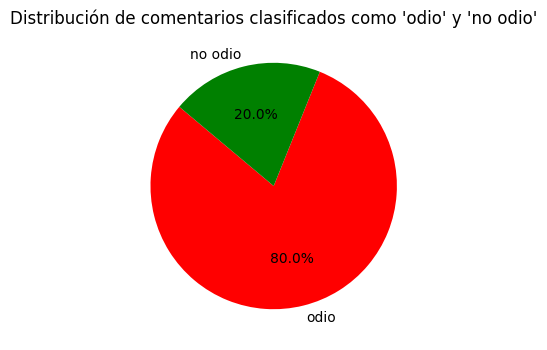

In [ ]:
# Función para determinar si un comentario contiene odio
def detectar_odio(texto):
    # Procesamos el texto con spaCy
    doc = nlp(texto.lower())
    # Verificamos si algún lema del texto está en los top lemas de "odio" ya calculados
    for token in doc:
        if token.lemma_ in [lema for lema, _ in top_100_lemas_odio]:  # Reutilizamos top_100_lemas_odio
            return True
    return False

# Ejemplo de comentarios
comentarios_ejemplo = [
    "Esa noticia es una basura y pura propaganda.",  # Corto, contenido de odio
    "El gobierno está trabajando duro para resolver los problemas.",  # Corto, sin odio
    "No entiendo cómo alguien puede ser tan incompetente, es una vergüenza.",  # Mediano, con posible odio
    "Gracias por la información tan detallada, siempre útil.",  # Mediano, sin odio
    "Esto es increíblemente injusto, están destruyendo todo lo que hemos construido.",  # Largo, con posible odio
    "El presidente dio un discurso que dejó a todos impresionados por su claridad.",  # Largo, sin odio
    "¡Qué desastre de noticia! Solo saben mentir y manipular a la gente.",  # Corto, contenido de odio
    "Me parece una opinión válida, aunque no estoy del todo de acuerdo.",  # Mediano, sin odio
    "La corrupción en este país es insostenible, necesitamos un cambio urgente.",  # Largo, con posible odio
    "Es genial ver cómo la comunidad se une para resolver problemas.",  # Mediano, sin odio
]

# Clasificamos los comentarios y mostramos el resultado
clasificaciones = []
for comentario in comentarios_ejemplo:
    es_odio = detectar_odio(comentario)
    clasificaciones.append('odio' if es_odio else 'no odio')
    print(f"Comentario: \"{comentario}\"")
    print(f"Contiene odio: {'Sí' if es_odio else 'No'}\n")

# Resumimos los resultados para graficar
resultados = {"odio": clasificaciones.count('odio'), "no odio": clasificaciones.count('no odio')}

# Crear el gráfico de tarta
plt.figure(figsize=(4, 4))
plt.pie(
    resultados.values(),
    labels=resultados.keys(),
    autopct='%1.1f%%',
    startangle=140,
    colors=['red', 'green'],
)
plt.title("Distribución de comentarios clasificados como 'odio' y 'no odio'")
plt.show()

El código comienza con la definición de una función llamada `detectar_odio`, cuyo propósito es analizar un texto y determinar si contiene palabras asociadas con comentarios de odio. Para ello, el texto se procesa y se representa como un objeto `doc`. La función recorre cada token del texto y verifica si su lema está presente en la lista `top_100_lemas_odio`, que contiene los lemas más frecuentes asociados con el odio en los datos previamente analizados. Si encuentra un lema coincidente, la función retorna `True`, indicando que el comentario contiene odio. Si no encuentra coincidencias, retorna `False`.

Después de definir la función, se proporciona una lista de comentarios de ejemplo que representan una mezcla de opiniones negativas y positivas de diferentes longitudes. Estos comentarios se clasifican utilizando la función `detectar_odio`, y el resultado de cada clasificación se almacena en una lista llamada `clasificaciones`. Para cada comentario, el programa imprime el texto junto con el resultado de la clasificación, indicando si el comentario contiene odio o no.

Posteriormente, los resultados se resumen en un diccionario llamado `resultados`, que almacena el conteo de comentarios clasificados como "odio" y "no odio". Este conteo se utiliza para generar un gráfico de tarta que visualiza la proporción de comentarios clasificados en ambas categorías. El gráfico se genera utilizando la biblioteca `matplotlib`, donde las categorías "odio" y "no odio" se representan con colores diferenciados (rojo y verde, respectivamente), y los porcentajes se muestran dentro de las secciones correspondientes. Este gráfico proporciona una representación visual clara de la distribución de los comentarios según su clasificación.

Es importante destacar que la clasificación no es completamente precisa debido a las limitaciones inherentes al método basado en palabras clave. Por ejemplo, comentarios neutrales o positivos que contienen palabras frecuentes en comentarios de odio, como "gobierno" o "presidente", pueden clasificarse erróneamente como "odio". De manera similar, comentarios de odio que no contienen palabras clave específicas pueden pasar desapercibidos. Aunque esta aproximación es útil para análisis exploratorios iniciales, no es adecuada para contextos que requieren una alta precisión.